In [190]:
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.stats import bernoulli
import numpy as np
from array import array

In [205]:
delta=[0.01*i for i in range(0,31)]

In [209]:
mu1=0.5
mu2=[0.5+0.01*i for i in range(1,31)]

In [210]:
T=1000

In [230]:
#UCB MULTI-BANDIT

l1=0
l2=0
u1=0
u2=0
t=1
x1=[]
x2=[]
cum_rec=0
t=1
x_2=0
x_1=0
tot_reg=[0 for i in range(30)]
for i in range(30):
    reg=[]
    for j in range(200): 
        l1=0
        l2=0
        u1=0
        u2=0
        t=1
        x1=[]
        x2=[]
        cum_rec=0
        t=1
        x_2=0
        x_1=0
        rando=np.random.uniform(0,1)
        if(rando<0.5):
            x_1=bernoulli.rvs(mu1)
            cum_rec+=x_1
            x1.append(x_1)
            u1=(np.mean(x1)+np.sqrt(2*np.log(T)/len(x1)))
            l1=(np.mean(x1)-np.sqrt(2*np.log(T)/len(x1)))

        elif(rando>=0.5):
                #print(mu2[i])
            x_2=bernoulli.rvs(mu2[i])
            cum_rec+=x_2
            x2.append(x_2)
            u2=(np.mean(x2)+np.sqrt(2*np.log(T)/len(x2)))
            l2=(np.mean(x2)-np.sqrt(2*np.log(T)/len(x2)))

        for t in range(2,T+1):
            if u1>u2:
                x_1=bernoulli.rvs(mu1)
                cum_rec+=x_1
                x1.append(x_1)
                u1=(np.mean(x1)+np.sqrt(2*np.log(T)/len(x1)))
                l1=(np.mean(x1)-np.sqrt(2*np.log(T)/len(x1)))

            elif u1<u2:
                x_2=bernoulli.rvs(mu2[i])
                cum_rec+=x_2
                x2.append(x_2)
                u2=(np.mean(x2)+np.sqrt(2*np.log(T)/len(x2)))
                l2=(np.mean(x2)-np.sqrt(2*np.log(T)/len(x2)))

            else:
                rando=np.random.uniform(0,1)
                if(rando<0.5):
                    x_1=bernoulli.rvs(mu1)
                    cum_rec+=x_1
                    x1.append(x_1)
                    u1=(np.mean(x1)+np.sqrt(2*np.log(T)/len(x1)))
                    l1=(np.mean(x1)-np.sqrt(2*np.log(T)/len(x1)))

                if(rando>0.5):
                    x_2=bernoulli.rvs(mu2[i])
                    cum_rec+=x_2
                    x2.append(x_2)
                    u2=(np.mean(x2)+np.sqrt(2*np.log(T)/len(x2)))
                    l2=(np.mean(x2)-np.sqrt(2*np.log(T)/len(x2)))

        reg.append(T*mu2[i]-cum_rec)
    tot_reg[i]=np.mean(reg)

In [231]:
cum_rec

519

In [236]:
(tot_reg)

[3.6099999999999999,
 9.7850000000000001,
 16.870000000000001,
 19.59,
 28.305,
 30.364999999999998,
 37.680000000000113,
 38.920000000000002,
 46.695,
 50.664999999999999,
 55.340000000000003,
 55.729999999999997,
 67.180000000000007,
 80.299999999999997,
 67.885000000000005,
 75.409999999999997,
 87.114999999999995,
 102.91499999999989,
 97.605000000000004,
 102.47499999999999,
 108.175,
 115.25,
 116.76000000000001,
 113.355,
 124.59999999999999,
 137.66499999999999,
 118.545,
 134.04499999999999,
 138.03999999999999,
 151.58500000000001]

In [237]:
#THOMPSON

delta=[0.01*i for i in range(1,31)]
tot_reg_t=[0 for i in range(30)]
t=1
cum_rec_T=0
alpha1=1
beta1=1
alpha2=1
beta2=1
xt_1=0
xt_2=0
x1t=[]
x2t=[]
for i in range(30):
    reg_t=[]
    for j in range(200):
        
        alpha1=1
        beta1=1
        alpha2=1
        beta2=1
        xt_1=0
        xt_2=0
        #x1t=[]
        #x2t=[]
        cum_rec_T=0
        for t in range(1000):
            theta_1=np.random.beta(alpha1,beta1)
            theta_2=np.random.beta(alpha2,beta2)

            if(theta_1>theta_2):
                x1_t=bernoulli.rvs(mu1)
                cum_rec_T+=x1_t
                alpha1=alpha1+x1_t
                beta1=beta1+(1-x1_t)

            elif(theta_2>theta_1):
                x2_t=bernoulli.rvs(mu2[i])
                cum_rec_T+=x2_t
                alpha2=alpha2+x2_t
                beta2=beta2+(1-x2_t)

            else:
                ran=np.random.uniform(0,1)
                if(ran<0.5):
                    x1_t=bernoulli.rvs(mu1)
                    cum_rec_T+=x1_t
                    alpha1=alpha1+x1_t
                    beta1=beta1+(1-x1_t)

                else:
                    x2_t=bernoulli.rvs(mu2[i])
                    cum_rec_T+=x2_t
                    alpha2=alpha2+x2_t
                    beta2=beta2+(1-x2_t)


        reg_t.append(T*mu2[i]-cum_rec_T)
    tot_reg_t[i]=np.mean(reg_t)  

In [239]:
tot_reg_t

[2.4900000000000002,
 8.5299999999999994,
 9.7149999999999999,
 10.76,
 11.869999999999999,
 13.32,
 11.390000000000114,
 10.615,
 13.645,
 13.145,
 13.295,
 11.565,
 11.56,
 12.529999999999999,
 10.074999999999999,
 7.5999999999999996,
 10.865,
 7.599999999999886,
 7.8600000000000003,
 7.2350000000000003,
 6.1600000000000001,
 6.5599999999999996,
 7.5099999999999998,
 6.9649999999999999,
 6.1749999999999998,
 5.3099999999999996,
 6.7699999999999996,
 6.7450000000000001,
 5.3399999999999999,
 6.1950000000000003]

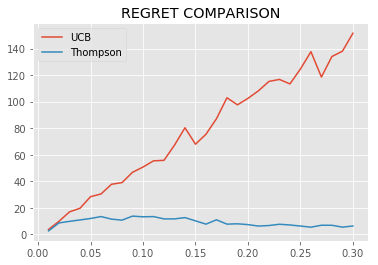

In [240]:
plt.plot(delta,tot_reg,label="UCB")
plt.plot(delta,tot_reg_t,label="Thompson")
plt.legend(loc="best")
plt.title("REGRET COMPARISON")
plt.show()